In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

2022-02-14 23:06:28.841770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-14 23:06:28.842653: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine which values to replace if counts are less than ...?
replace_application = application_df.APPLICATION_TYPE.value_counts()[application_df.APPLICATION_TYPE.value_counts() < 60].index

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Determine which values to replace if counts are less than ..?
replace_class = application_df.CLASSIFICATION.value_counts()[application_df.CLASSIFICATION.value_counts() < 1000].index

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [5]:
# Generate our categorical variable lists
application_cat = [k for k, v in application_df.dtypes.iteritems() if v == 'object']

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df.loc[:, application_cat].values))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/home/rhoslug/.cache/pypoetry/virtualenvs/trilogy-XBf8Ba-y-py3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
# Merge one-hot encoded features and drop the originals
application_merged_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat)
application_merged_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Split our preprocessed data into our features and target arrays
y = application_merged_df.IS_SUCCESSFUL.values
X = application_merged_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')

2022-02-14 23:06:36.267241: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-14 23:06:36.268171: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-14 23:06:36.269194: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-2ESRRKP): /proc/driver/nvidia/version does not exist
2022-02-14 23:06:36.273114: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
nn_imported.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.5462 - accuracy: 0.7338
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5468 - accuracy: 0.7340
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5465 - accuracy: 0.7339
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5464 - accuracy: 0.7340
Epoch 5/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5461 - accuracy: 0.7340
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5464 - accuracy: 0.7340
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5465 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5461 - accuracy: 0.7341
Epoch 9/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5457 - accuracy: 0.7339
Epoch 10/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5459 - accura

In [13]:
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 1s - loss: 0.5569 - accuracy: 0.7262 - 1s/epoch - 4ms/step
Loss: 0.5568591952323914, Accuracy: 0.7261807322502136


# Optimizing the model (Adding nodes)

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X.shape[1]
hidden_layer_1_nodes = 6
hidden_layer_2_nodes = 8
hidden_layer_3_nodes = 6


nn_big = tf.keras.models.Sequential()

# First hidden layer
nn_big.add(
    tf.keras.layers.Dense(units=hidden_layer_1_nodes, input_dim=number_input_features, activation='relu')
)

# Second hidden layer
nn_big.add(
    tf.keras.layers.Dense(units=hidden_layer_2_nodes, activation='relu')
)

nn_big.add(
    tf.keras.layers.Dense(units=hidden_layer_3_nodes, activation='relu')
)

# Output layer
nn_big.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_big.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 276       
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [15]:
nn_big.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
nn_big.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.6219 - accuracy: 0.6941
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5673 - accuracy: 0.7264
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5609 - accuracy: 0.7276
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5580 - accuracy: 0.7290
Epoch 5/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5566 - accuracy: 0.7299
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5552 - accuracy: 0.7304
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5545 - accuracy: 0.7302
Epoch 8/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5537 - accuracy: 0.7304
Epoch 9/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5533 - accuracy: 0.7301
Epoch 10/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5524 - accura

In [17]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='STATUS', ylabel='STATUS'>,
        <AxesSubplot:xlabel='ASK_AMT', ylabel='STATUS'>,
        <AxesSubplot:xlabel='IS_SUCCESSFUL', ylabel='STATUS'>],
       [<AxesSubplot:xlabel='STATUS', ylabel='ASK_AMT'>,
        <AxesSubplot:xlabel='ASK_AMT', ylabel='ASK_AMT'>,
        <AxesSubplot:xlabel='IS_SUCCESSFUL', ylabel='ASK_AMT'>],
       [<AxesSubplot:xlabel='STATUS', ylabel='IS_SUCCESSFUL'>,
        <AxesSubplot:xlabel='ASK_AMT', ylabel='IS_SUCCESSFUL'>,
        <AxesSubplot:xlabel='IS_SUCCESSFUL', ylabel='IS_SUCCESSFUL'>]],
      dtype=object)

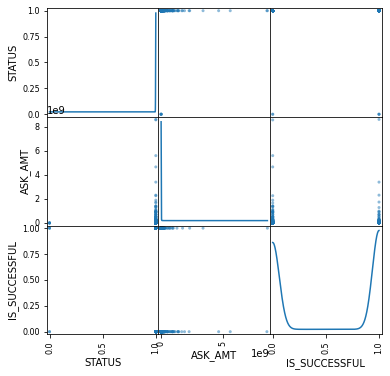

In [18]:
scatter_matrix(application_df, figsize=(6, 6), diagonal='kde')

# Optimizing the model (Munging data, altering neural net, activation function, etc)

In [19]:
df_applications = pd.read_csv("charity_data.csv")
df_applications.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
df_applications = df_applications.drop(columns=['EIN', 'NAME'])

In [21]:
cls_other = list(df_applications.CLASSIFICATION.value_counts()[df_applications.CLASSIFICATION.value_counts() < 100].index)

In [22]:
df_applications.loc[df_applications.CLASSIFICATION.isin(cls_other), 'CLASSIFICATION'] = 'Other'

In [23]:
app_other = list(df_applications.APPLICATION_TYPE.value_counts()[df_applications.APPLICATION_TYPE.value_counts() < 500].index)
app_other

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [24]:
df_applications.loc[df_applications.APPLICATION_TYPE.isin(app_other), 'APPLICATION_TYPE'] = 'Other'

In [25]:
df_applications_encoded = pd.get_dummies(df_applications)
df_applications_encoded.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [26]:
y = df_applications_encoded.IS_SUCCESSFUL.values
X = df_applications_encoded.drop(columns=['IS_SUCCESSFUL']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X.shape[1]
hidden_layer_1_nodes = 6
hidden_layer_2_nodes = 4


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_layer_1_nodes, input_dim=number_input_features, activation='tanh')
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_layer_2_nodes, activation='tanh')
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 300       
                                                                 
 dense_5 (Dense)             (None, 4)                 28        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.6073 - accuracy: 0.6815
Epoch 2/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5669 - accuracy: 0.7252
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5614 - accuracy: 0.7278
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5589 - accuracy: 0.7276
Epoch 5/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5568 - accuracy: 0.7282
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5557 - accuracy: 0.7288
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5547 - accuracy: 0.7285
Epoch 8/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5535 - accuracy: 0.7286
Epoch 9/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5528 - accuracy: 0.7303
Epoch 10/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5520 - accura

In [31]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 1s - loss: 0.5541 - accuracy: 0.7269 - 974ms/epoch - 4ms/step
Loss: 0.5541114807128906, Accuracy: 0.7268804907798767


In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X.shape[1]
hidden_layer_1_nodes = 6
hidden_layer_2_nodes = 8
hidden_layer_3_nodes = 6


nn_big = tf.keras.models.Sequential()

# First hidden layer
nn_big.add(
    tf.keras.layers.Dense(units=hidden_layer_1_nodes, input_dim=number_input_features, activation='tanh')
)

# Second hidden layer
nn_big.add(
    tf.keras.layers.Dense(units=hidden_layer_2_nodes, activation='tanh')
)

nn_big.add(
    tf.keras.layers.Dense(units=hidden_layer_3_nodes, activation='tanh')
)

# Output layer
nn_big.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_big.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 300       
                                                                 
 dense_8 (Dense)             (None, 8)                 56        
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [33]:
nn_big.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
os.makedirs('checkpoints', exist_ok=True)
checkpoint_filename = 'checkpoints/optimized_weights.{epoch:02d}.hdf5'

In [35]:
save_callback = ModelCheckpoint(
    filepath=checkpoint_filename,
    verbose=1,
    save_weights_only=True,
    save_freq=804 * 5,    
)
nn_big.fit(X_train_scaled, y_train, epochs=100, callbacks=[save_callback])

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.5995 - accuracy: 0.6965
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5678 - accuracy: 0.7230
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5587 - accuracy: 0.7270
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5559 - accuracy: 0.7300
Epoch 5/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5540 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5529 - accuracy: 0.7315
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5518 - accuracy: 0.7303
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5508 - accuracy: 0.7329
Epoch 9/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5503 - accuracy: 0.7322
Epoch 10/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5494 - accura

In [36]:
model_loss, model_accuracy = nn_big.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 1s - loss: 0.5543 - accuracy: 0.7258 - 954ms/epoch - 4ms/step
Loss: 0.5542895197868347, Accuracy: 0.7258309125900269


In [37]:
nn_big.save('AlphabetSoupCharity_Optimization.h5')